In [162]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import matplotlib.colors
import matplotlib.colors as mcolors
import statsmodels.api as sm
data = pd.read_csv('Salary Data.csv', index_col=0)

In [163]:
data.columns # list colums names

Index(['Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [164]:
data.isnull().sum()   # Check for Missing Values

Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [165]:
data.isna().sum()

Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [166]:
data_cleaned= data.dropna(how='all') #removing all missing values 

In [167]:
data_cleaned

,Gender,Education Level,Job Title,Years of Experience,Salary
Age,,,,,
32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
28.0,Female,Master's,Data Analyst,3.0,65000.0
45.0,Male,PhD,Senior Manager,15.0,150000.0
36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...
35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
43.0,Male,Master's,Director of Operations,19.0,170000.0
29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0


In [168]:
data_cleaned.isnull().sum()

Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [169]:
df=data_cleaned.reset_index()

In [170]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
368,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
369,43.0,Male,Master's,Director of Operations,19.0,170000.0
370,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
371,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [171]:
df= pd.DataFrame(data_cleaned.reset_index()) # save data_cleaned as DataFrame(df)

In [172]:
df.head() #  to view the first few rows of the dataset

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [173]:
df.describe() # Summary of statistics for numerical columns.

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [174]:
df.describe(include='object') # Summary of statistics for categorical columns

,Gender,Education Level,Job Title
count,373,373,373
unique,2,3,174
top,Male,Bachelor's,Director of Marketing
freq,194,224,12


In [175]:
df['Salary'].unique() # Get unique values for a  Salary column

array([ 90000.,  65000., 150000.,  60000., 200000.,  55000., 120000.,
        80000.,  45000., 110000.,  75000., 140000., 130000.,  40000.,
       125000., 115000.,  35000., 180000., 190000.,  50000., 250000.,
       170000., 160000.,  85000.,  95000., 105000.,  70000., 100000.,
        30000., 135000., 220000., 175000., 185000., 145000., 155000.,
          350.])

In [176]:
df['Years of Experience'].unique() #Get unique values for a Years of Experience column

array([ 5. ,  3. , 15. ,  7. , 20. ,  2. , 12. ,  4. ,  1. , 10. , 18. ,
        6. , 14. , 16. ,  0. , 22. , 19. ,  9. , 13. , 11. , 25. , 21. ,
        8. , 17. , 23. , 24. ,  0.5,  1.5])

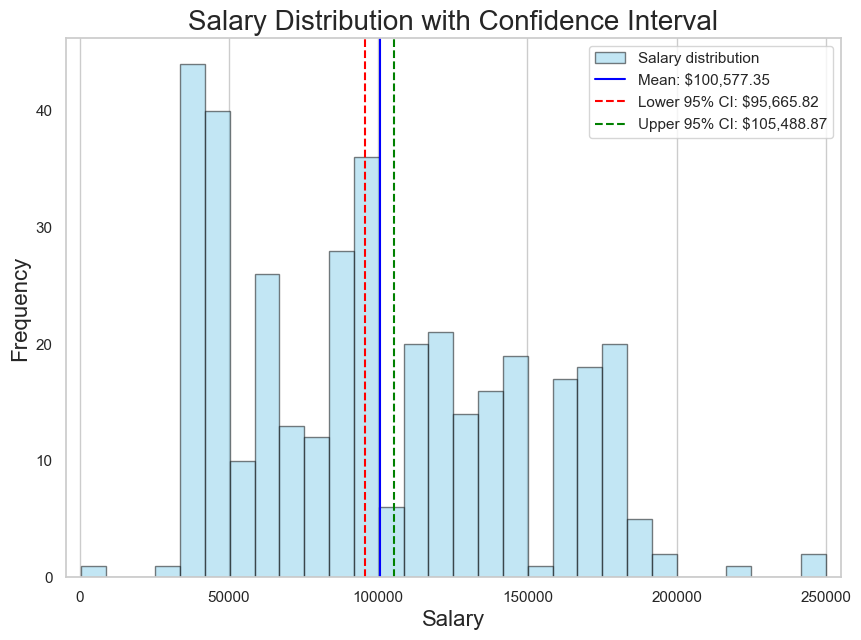

In [177]:
#Define the confidence level and degrees of freedom
confidence_level = 0.95
degrees_freedom = df['Salary'].count() - 1
 
#Calculate the confidence interval for 'Salary'
confidence_interval = stats.t.interval(confidence_level, degrees_freedom,
                                       loc=df['Salary'].mean(),
                                       scale=df['Salary'].sem())
plt.figure(figsize=(10, 7))
plt.hist(df['Salary'], bins=30, color='skyblue', edgecolor='black', alpha=0.5, label='Salary distribution')
# Vertical lines for sample mean and confidence interval with adjusted styles
plt.axvline(df['Salary'].mean(), color='blue', linestyle='-', label=f'Mean: ${df["Salary"].mean():,.2f}')
plt.axvline(confidence_interval[0], color='red', linestyle='--', label=f'Lower 95% CI: ${confidence_interval[0]:,.2f}')
plt.axvline(confidence_interval[1], color='green', linestyle='--', label=f'Upper 95% CI: ${confidence_interval[1]:,.2f}')
# Annotations and labels
plt.title('Salary Distribution with Confidence Interval', fontsize=20)
plt.xlabel('Salary', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xlim([min(df['Salary']) - 5000, max(df['Salary']) + 5000])
plt.legend()
plt.grid(axis='y')
plt.show()

C:\Docs\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


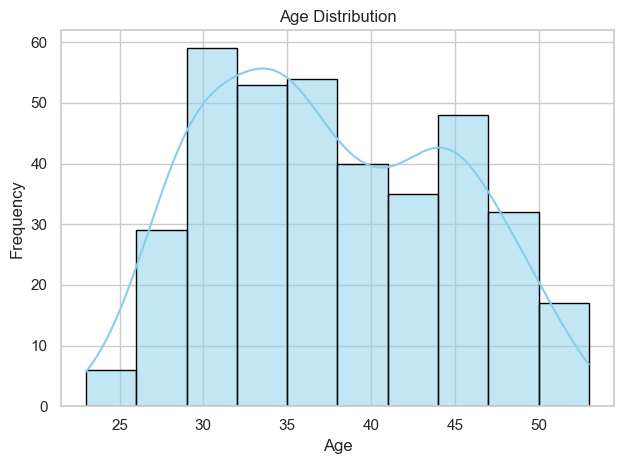

In [178]:
sns.histplot(df['Age'], kde=True, edgecolor='black',color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

plt.tight_layout()
plt.show()

C:\Docs\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


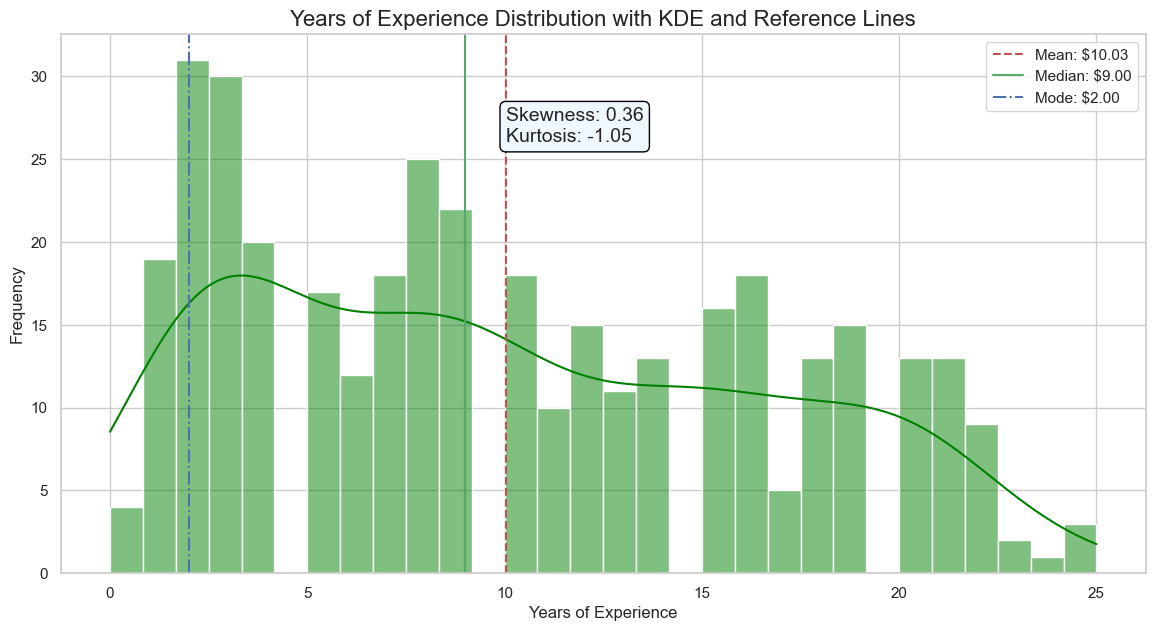

In [179]:
# Setting up the style
sns.set_style("whitegrid")

# Calculate Mean, Median, Mode for Salary
mean_Years_of_Experience = df['Years of Experience'].mean()
median_Years_of_Experience = df['Years of Experience'].median()
mode_Years_of_Experience = df['Years of Experience'].mode().values[0]

# Plotting the histogram
plt.figure(figsize=(14, 7))
sns.histplot(df['Years of Experience'], bins=30, kde=True, color="green")

# Adding vertical lines for mean, median, and mode
plt.axvline(mean_Years_of_Experience, color='r', linestyle='--', label=f"Mean: ${mean_Years_of_Experience:.2f}")
plt.axvline(median_Years_of_Experience, color='g', linestyle='-', label=f"Median: ${median_Years_of_Experience:.2f}")
plt.axvline(mode_Years_of_Experience, color='b', linestyle='-.', label=f"Mode: ${mode_Years_of_Experience:.2f}")

# Calculating skewness and kurtosis for Years of Experience
skewness_Years_of_Experience = df['Years of Experience'].skew()
Kurtosis_Years_of_Experience = df['Years of Experience'].kurt()

# Annotations for skewness and kurtosis
plt.annotate(
    f'Skewness: {skewness_Years_of_Experience:.2f}\nKurtosis: {Kurtosis_Years_of_Experience:.2f}',
    xy=(mean_Years_of_Experience, plt.ylim()[1]*0.8),  # Adjust xy to place annotation appropriately
    fontsize=14,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="aliceblue"),
    arrowprops=dict(arrowstyle="->")
)
# Adding titles and labels
plt.title('Years of Experience Distribution with KDE and Reference Lines', fontsize=16)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

# Display the plot
plt.show()

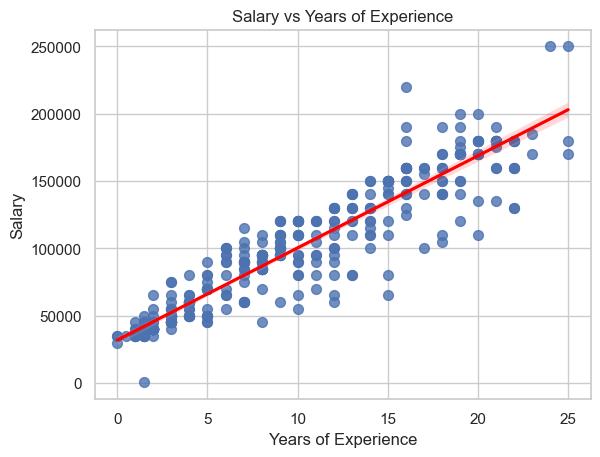

In [180]:
sns.regplot(x='Years of Experience', y='Salary', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})

# Add titles and labels
plt.title('Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

# Show the plot
plt.show()

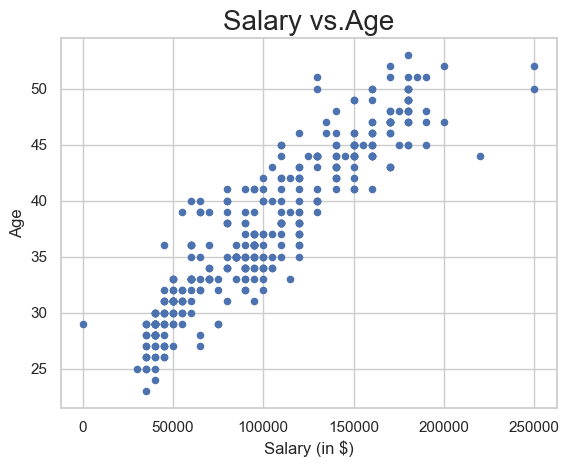

In [181]:
df.plot.scatter(x='Salary', y='Age')
plt.title('Salary vs.Age',fontsize=20)
plt.ylabel('Age')
plt.xlabel('Salary (in $)');

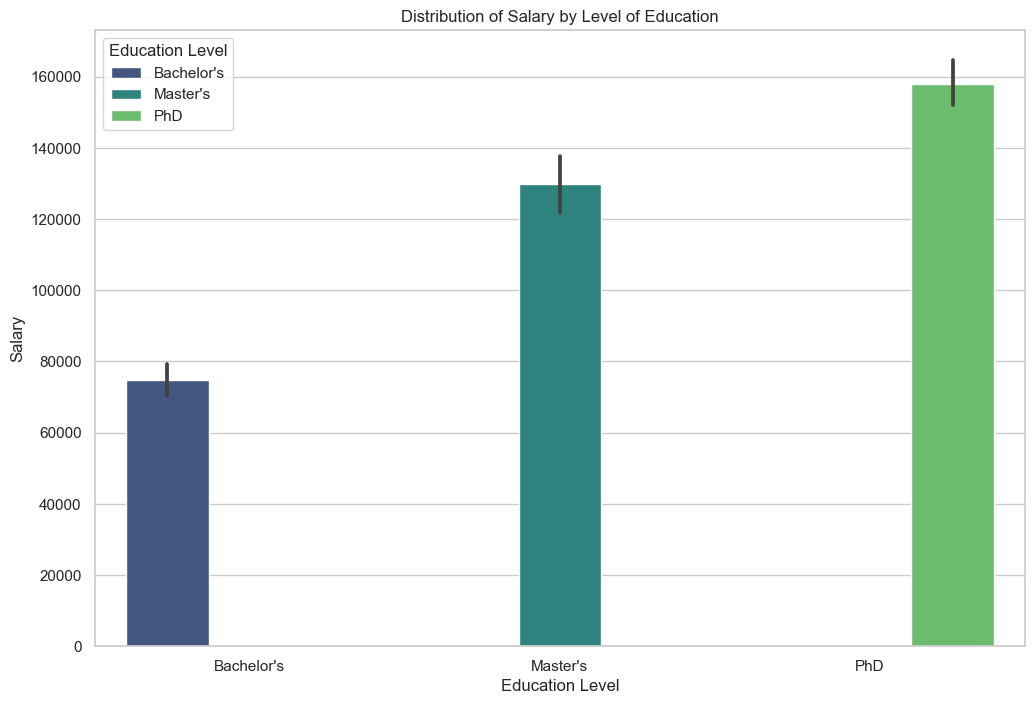

In [182]:
plt.figure(figsize=(12, 8));
sns.barplot(x='Education Level', y='Salary', data=df,  palette='viridis',  hue='Education Level',);
sns.set_theme(style="whitegrid");
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.title('Distribution of Salary by Level of Education');

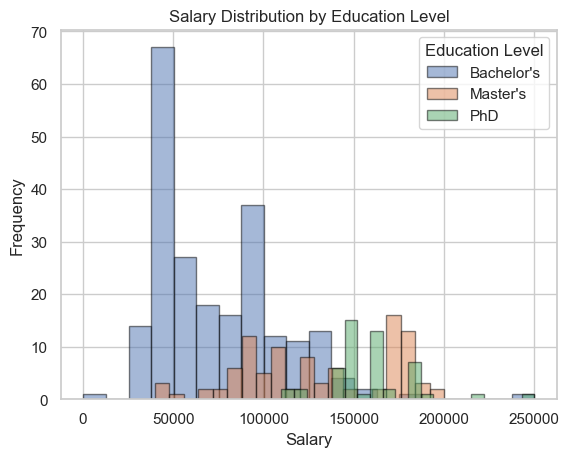

In [183]:
categories = df['Education Level'].unique()
for category in categories:
    subset = df[df['Education Level'] == category]
    plt.hist(subset['Salary'], bins=20, alpha=0.5, label=category, edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution by Education Level')
plt.legend(title='Education Level');

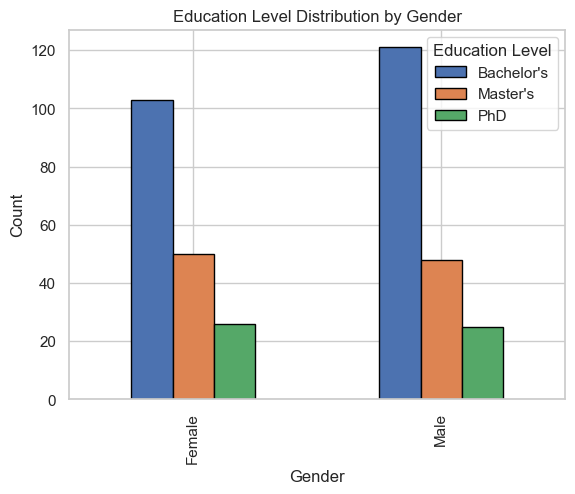

In [184]:
cross_tab = pd.crosstab(df['Gender'], df['Education Level'])
cross_tab.plot(kind='bar', edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Count')
ax=plt.title('Education Level Distribution by Gender')
plt.legend(title='Education Level');

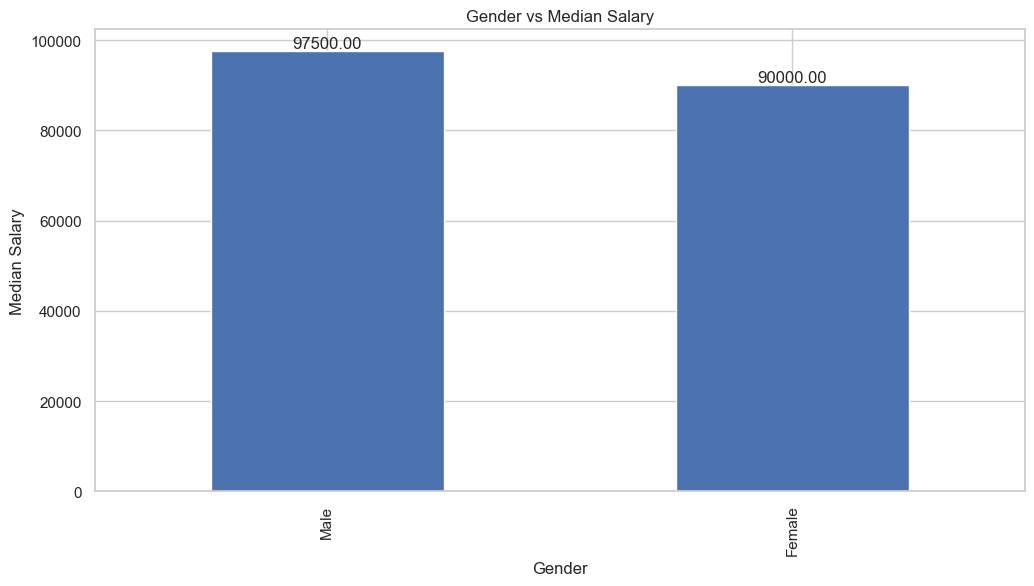

In [185]:
plt.figure(figsize=(12, 6))

# Calculate median salary for each education level and sort it
median_salaries = df.groupby('Gender')['Salary'].median().sort_values(ascending=False)

# Plot the bar chart
bars = median_salaries.plot.bar( color='b')

# Annotate each bar with the median salary value
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', 
             ha='center', va='bottom')

# Set labels and title
plt.xlabel('Gender')                               
plt.ylabel('Median Salary')
plt.title('Gender vs Median Salary'); # Which Gender has the highest median Salary 

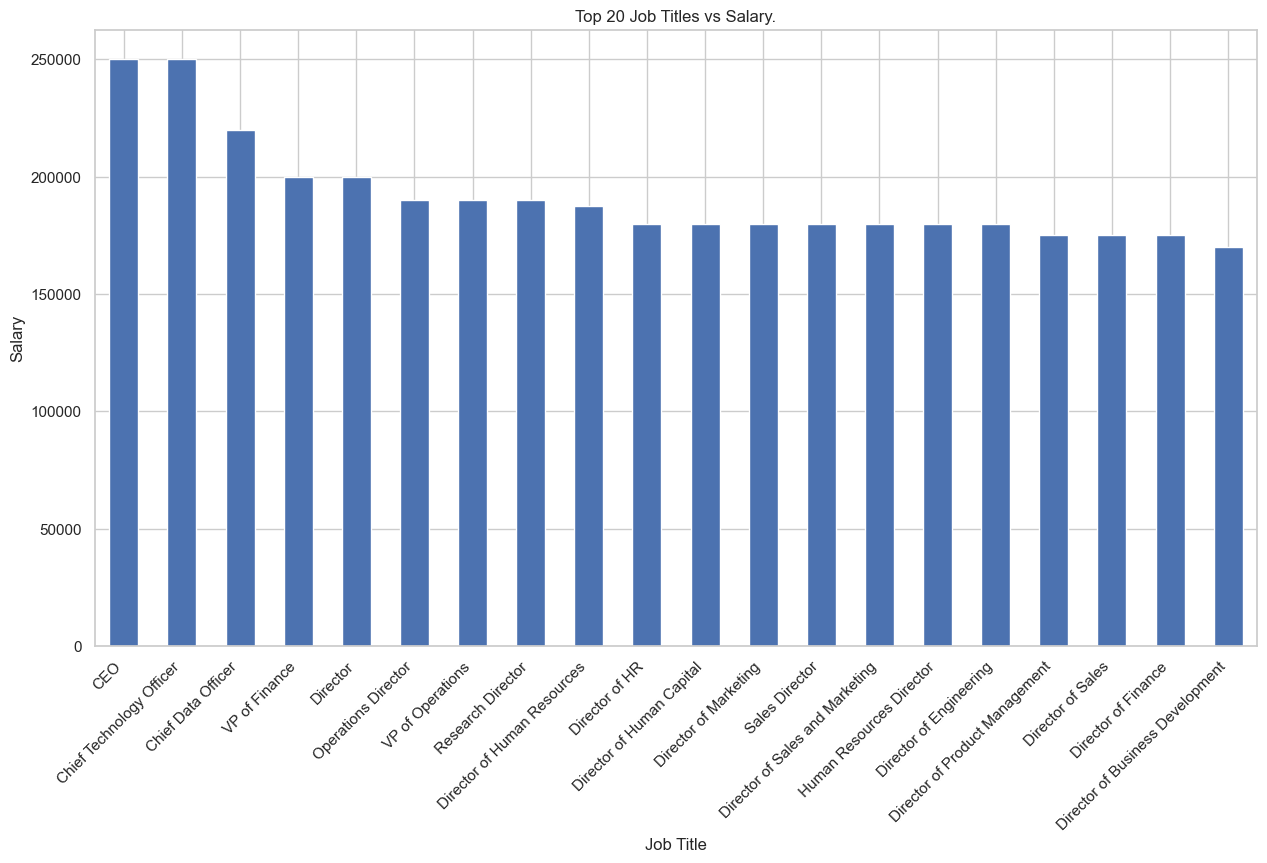

In [186]:
plt.figure(figsize = (15,8))
pt=df.groupby('Job Title')['Salary'].median().sort_values(ascending=False).head(20).plot.bar(color= 'b')
pt.set_xticklabels(pt.get_xticklabels(),rotation=45, horizontalalignment='right');
plt.xlabel('Job Title')                               
plt.ylabel('Salary')
plt.title('Top 20 Job Titles vs Salary.'); # Which Gender has the highest median Salary 
plt.savefig('Jobttl2vsSalary.png')

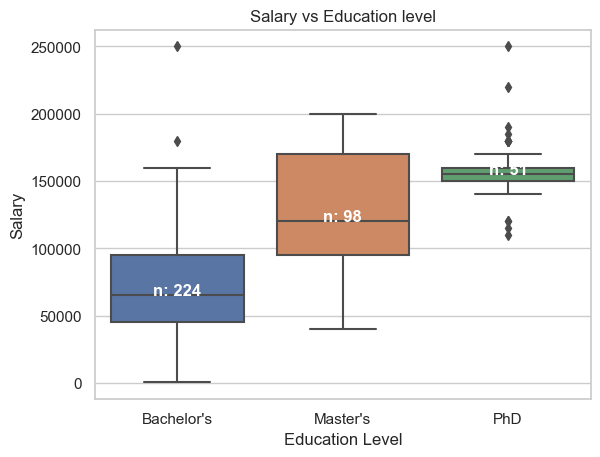

In [187]:
# Start with a basic boxplot
ax=sns.boxplot(x="Education Level", y="Salary", data=df)
 
# Calculate number of obs per group & median to position labels
medians = df.groupby(['Education Level'])['Salary'].median().values
nobs = df.groupby("Education Level").size().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    plt.text(pos[tick], medians[tick] + 0.4, nobs[tick], horizontalalignment='center', size='medium', color='w', weight='semibold')

# add title
plt.title("Salary vs Education level", loc="center");
#to show the number of observations in the boxplot

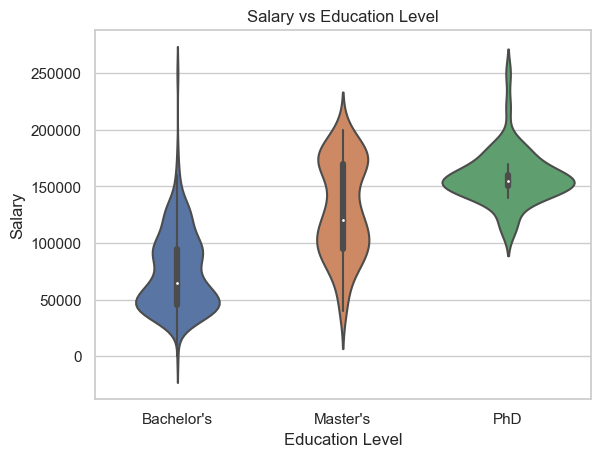

In [188]:
# plot violin chart
sns.violinplot( x='Education Level', y='Salary', data=df)

plt.title("Salary vs Education Level", loc="center");


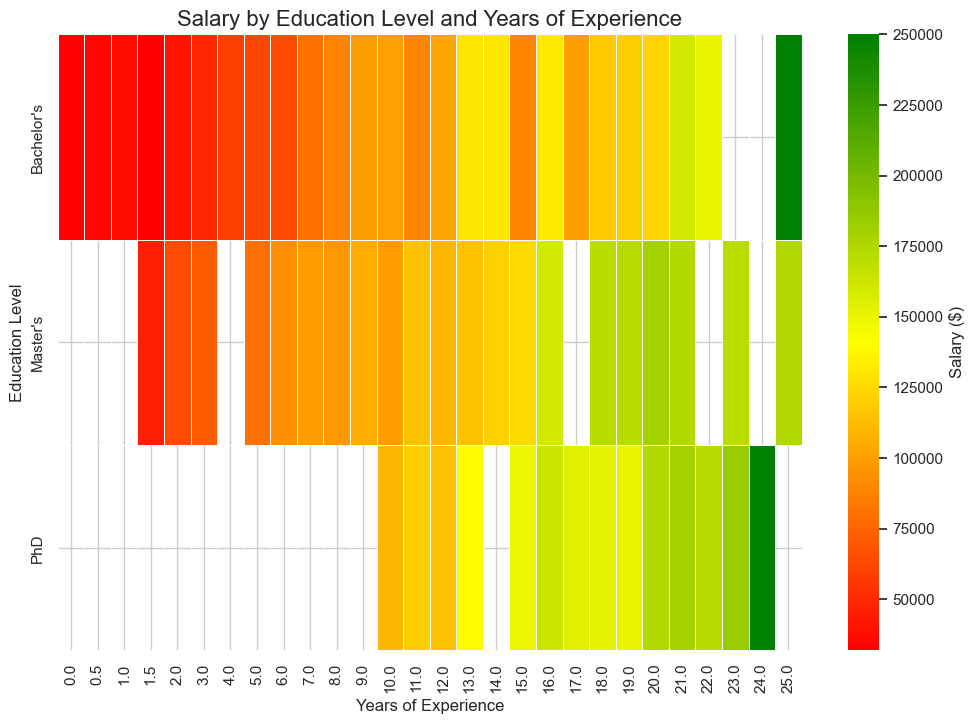

In [189]:
df = pd.DataFrame(data)

# Pivot the DataFrame
pivot_table = df.pivot_table(index='Education Level', columns='Years of Experience', values='Salary')

# Create a custom colormap
cmap = mcolors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(pivot_table, 
            annot=False,        # Annotate each cell with the numeric value
            fmt=".0f",         # Format numbers as integers
            cmap=cmap,         # Custom colormap
            linewidths=.5,    # Lines between cells
            cbar_kws={'label': 'Salary ($)'})  # Colorbar label

# Adding title and labels
plt.title('Salary by Education Level and Years of Experience', fontsize=16)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Education Level', fontsize=12)

# Display the heatmap
plt.show()

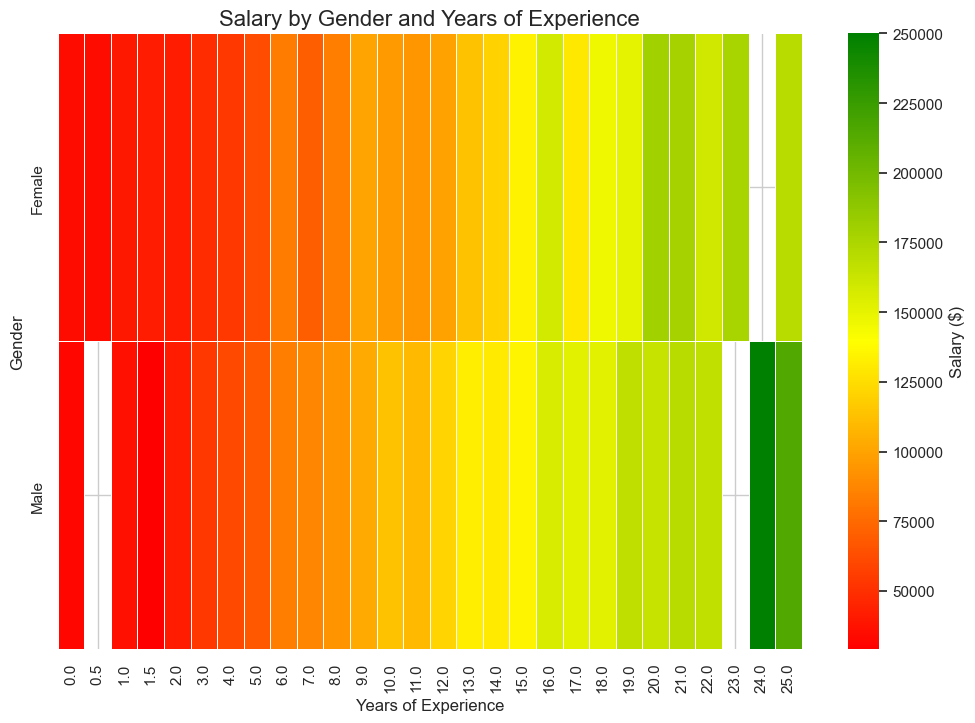

In [190]:
df = pd.DataFrame(data)

# Pivot the DataFrame
pivot_table = df.pivot_table(index='Gender', columns='Years of Experience', values='Salary')

# Create a custom colormap
cmap = mcolors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(pivot_table, 
            annot=False,        # Annotate each cell with the numeric value
            fmt=".0f",         # Format numbers as integers
            cmap=cmap,         # Custom colormap
            linewidths=.5,    # Lines between cells
            cbar_kws={'label': 'Salary ($)'})  # Colorbar label

# Adding title and labels
plt.title('Salary by Gender and Years of Experience', fontsize=16)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Gender', fontsize=12)

plt.show()

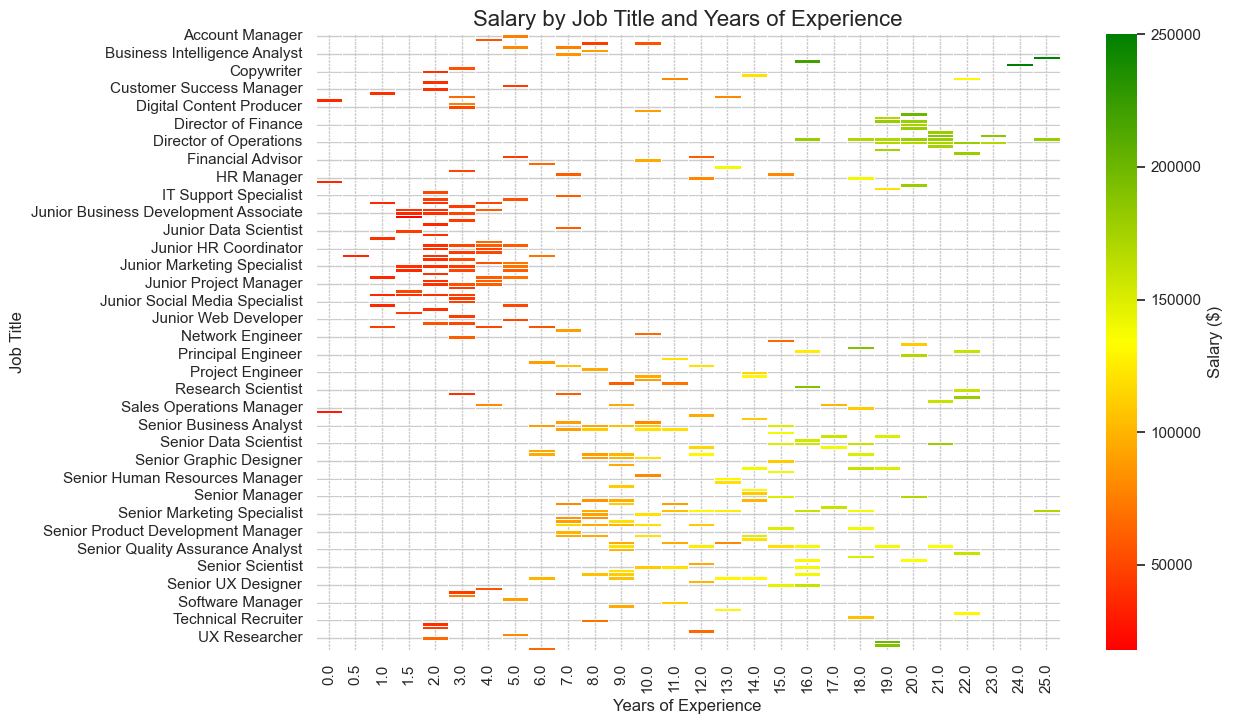

In [191]:
df = pd.DataFrame(data)

# Pivot the DataFrame
pivot_table = df.pivot_table(index='Job Title', columns='Years of Experience', values='Salary')

# Create a custom colormap
cmap = mcolors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(pivot_table, 
            annot=False,        # Annotate each cell with the numeric value
            fmt=".0f",         # Format numbers as integers
            cmap=cmap,         # Custom colormap
            linewidths=.5,    # Lines between cells
            cbar_kws={'label': 'Salary ($)'})  # Colorbar label

# Adding title and labels
plt.title('Salary by Job Title and Years of Experience', fontsize=16)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Job Title', fontsize=12)

# Display the heatmap
plt.show()

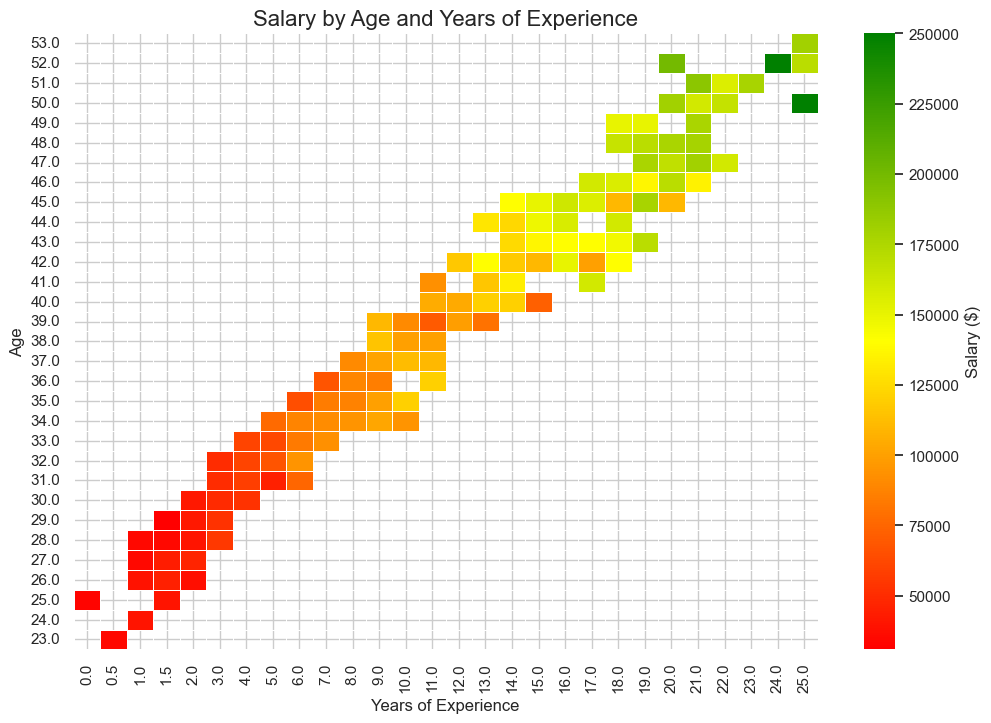

In [192]:
df = pd.DataFrame(data)

# Pivot the DataFrame
pivot_table = df.pivot_table(index='Age', columns='Years of Experience', values='Salary')
pivot_table.sort_index(ascending=False, inplace=True)


# Create a custom colormap
cmap = mcolors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(pivot_table,
            annot=False,        # Annotate each cell with the numeric value
            fmt=".0f",         # Format numbers as integers
            cmap=cmap,         # Custom colormap
            linewidths=.5,    # Lines between cells
            cbar_kws={'label': 'Salary ($)'})  # Colorbar label

# Adding title and labels
plt.title('Salary by Age and Years of Experience', fontsize=16)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.show()

In [193]:
df=df.reset_index()
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [194]:
correlations = df.corr(numeric_only=True)['Salary'].sort_values(ascending=False)
correlations

Salary                 1.000000
Years of Experience    0.930338
Age                    0.922335
Name: Salary, dtype: float64

In [195]:
top_correlations = correlations[1:5]
print(top_correlations)

Years of Experience    0.930338
Age                    0.922335
Name: Salary, dtype: float64


In [196]:
selected_features = list(top_correlations.index) + ['Salary']

In [197]:
correlation_matrix = df[selected_features].corr()

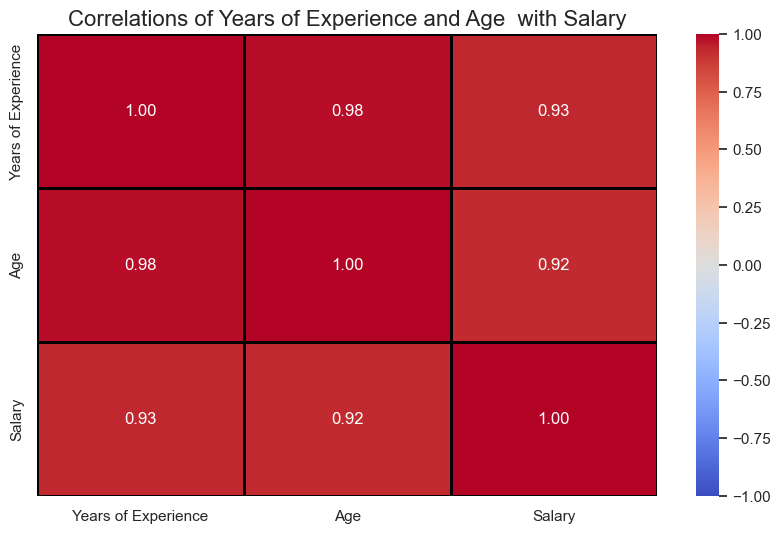

In [201]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix,vmin=-1, vmax=1,annot=True, cmap='coolwarm',linewidths=1, fmt=".2f", linecolor='black' )
plt.title("Correlations of Years of Experience and Age  with Salary", fontsize=16)
plt.show()